In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

%matplotlib widget

def load_gps_data(file_path):
    """JSONファイルからGPSデータを読み込む"""
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError) as e:
                print(f"スキップされた不正なデータ: {entry} | エラー: {e}")
        
        return sorted(processed, key=lambda x: x['time'])
    
    except Exception as e:
        print(f"エラー発生: {str(e)}")
        return []

gps_data = load_gps_data("C:\\Users\\showe\\Desktop\\experiment\\clean\\2025_01_30\\miyakita5185.json")



スキップされた不正なデータ: {'from': 'miyakita5185', 'unixTime': '1738205220332', 'event': 'startSearch'} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita6003', 'event': 'endpointFound', 'unixTime': 1738205220387} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita9301', 'event': 'endpointFound', 'unixTime': 1738205220490} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita6247', 'event': 'endpointFound', 'unixTime': 1738205220996} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita101', 'event': 'endpointFound', 'unixTime': 1738205222133} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita6003', 'event': 'connected', 'unixTime': 1738205222824} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita6003', 'event': 'sendStart', 'unixTime': 1738205222977} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita5185', 'to': 'miyakita6003', 'event': 'sendFinish', 'unixTime': 173

C:\Users\showe\AppData\Local\Temp\ipykernel_5024\1414033135.py:19: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


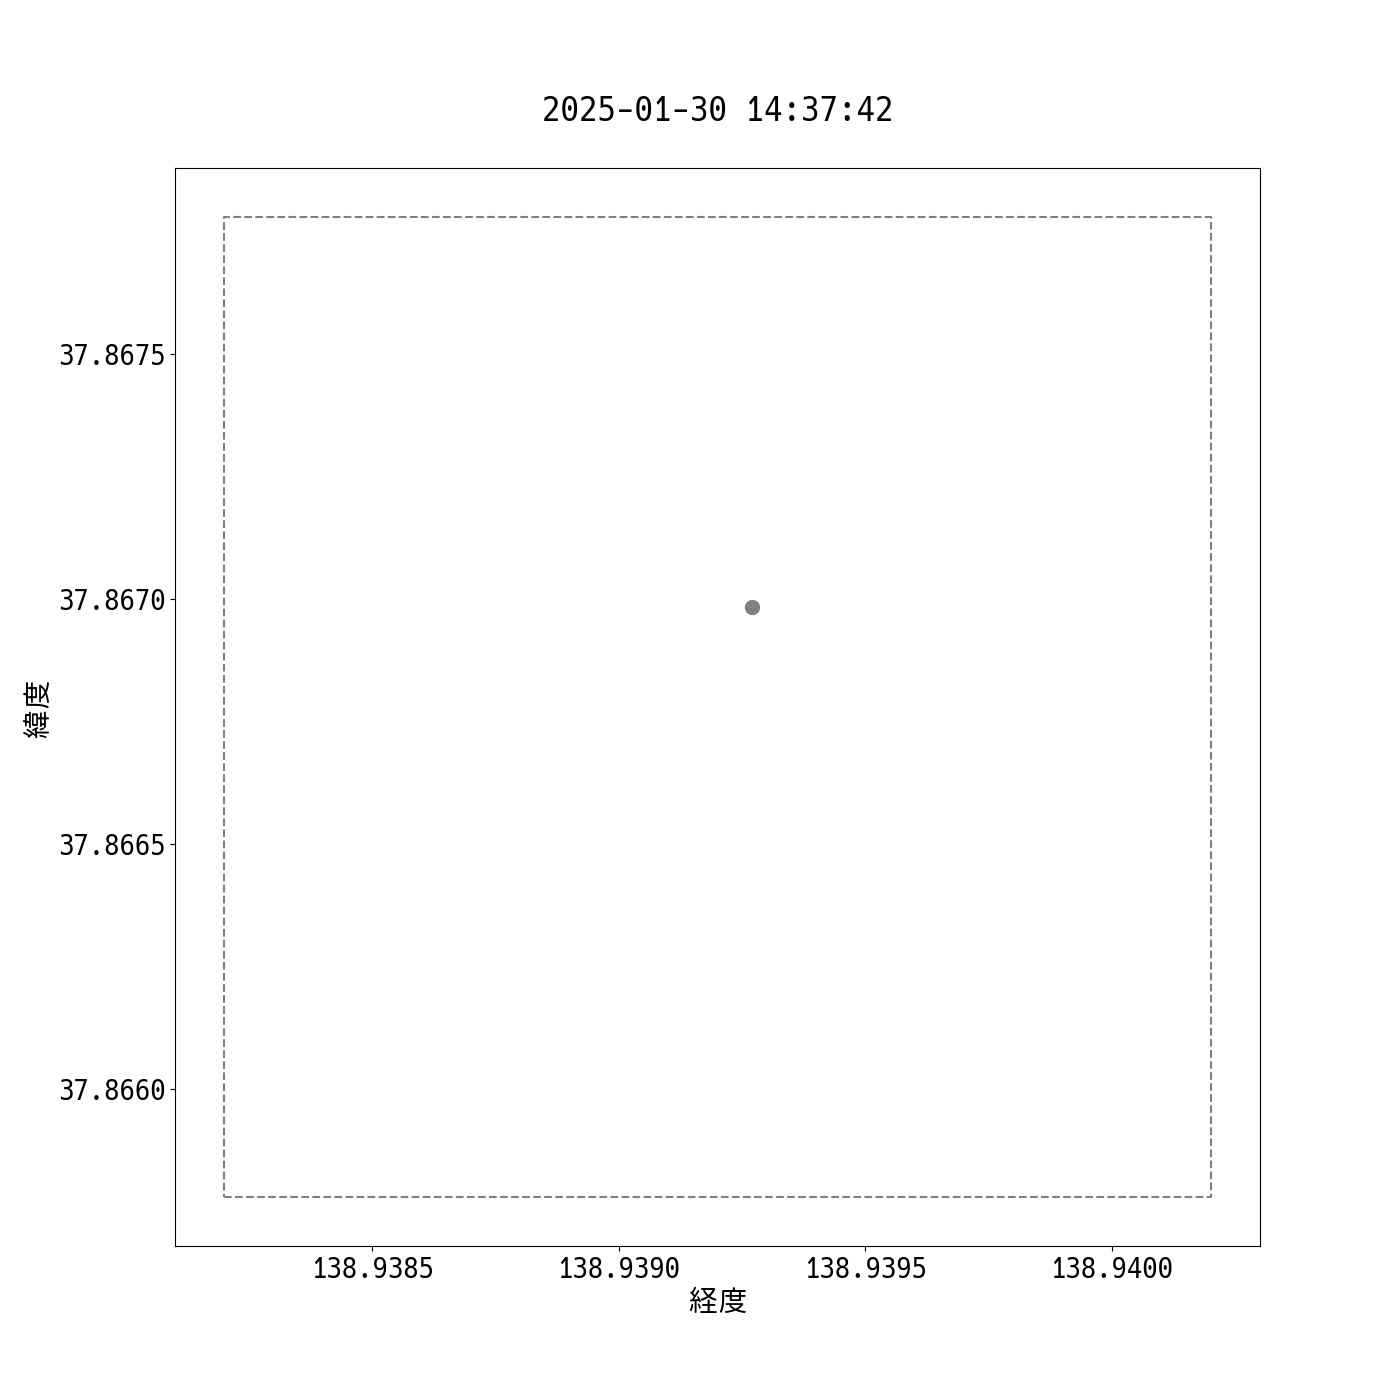

In [25]:
if not gps_data:
    print("有効なデータがありません")
else:
    # 中心座標を指定
    centerLatitude = 37.86678
    centerLongitude = 138.93920
    
    # 正方形の範囲を定義
    half_side = 0.001
    xlim = [centerLongitude - half_side, centerLongitude + half_side]
    ylim = [centerLatitude - half_side, centerLatitude + half_side]

    # 全体の範囲を取得（余裕を持たせた範囲）
    all_lons = [d['lon'] for d in gps_data]
    all_lats = [d['lat'] for d in gps_data]
    ax.set_xlim(min(all_lons)-0.001, max(all_lons)+0.001)
    ax.set_ylim(min(all_lats)-0.001, max(all_lats)+0.001)

    # プロットの準備
    fig, ax = plt.subplots(figsize=(14, 14))
    plt.rcParams["font.size"] = 21
    plt.rcParams["font.family"] = "HackGen Console NF"
    point = ax.scatter([], [], c='r', s=100, edgecolors='k', zorder=3)

    # 正方形を描画
    square_x = [xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]]
    square_y = [ylim[0], ylim[0], ylim[1], ylim[1], ylim[0]]
    ax.plot(square_x, square_y, 'k--', alpha=0.5)

    # 軸の設定
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.0005))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.0005))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
    ax.set_xlabel("経度", fontsize=21)  # x軸のラベルのフォントサイズを変更
    ax.set_ylabel("緯度", fontsize=21)  # y軸のラベルのフォントサイズを変更
    ax.tick_params(axis='both', labelsize=21)

    def update(frame):
        if frame >= len(gps_data):
            return point,  # もうデータがない場合
        
        current = gps_data[frame]  # 現在のフレームのデータを取得
        lon = current['lon']
        lat = current['lat']
        image_length = current['image_length']  # 現在の点のimageLength
        color = 'r' if image_length > 0 else 'gray'  # imageLengthが1以上なら赤、0なら灰色
        
        # 点の位置と色を更新
        point.set_offsets(np.c_[lon, lat])
        point.set_color(color)
        
        # タイトルを更新
        ax.set_title(f"{current['time'].strftime('%Y-%m-%d %H:%M:%S')}\n")
        
        return point,

    ani = animation.FuncAnimation(
        fig, update,
        frames=len(gps_data),
        interval=50,
        blit=False
    )
    
    # アニメーションを保存
    ani.save('anim.mp4', writer="ffmpeg")
    #plt.show()
    #HTML(ani.to_html5_video())

C:\Users\showe\AppData\Local\Temp\ipykernel_22212\1937899764.py:20: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


スキップされた不正なデータ: {'from': 'miyakita1028', 'unixTime': '1737945773196', 'event': 'startSearch'} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'endpointFound', 'unixTime': 1737945773293} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'connected', 'unixTime': 1737945778432} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'sendStart', 'unixTime': 1737945778575} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'discconected', 'unixTime': 1737945879242} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita3276', 'event': 'endpointFound', 'unixTime': 1737945889561} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita4782', 'event': 'endpointFound', 'unixTime': 1737945893054} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita3276', 'event': 'connected', 'unixTime': 1737

C:\Users\showe\AppData\Local\Temp\ipykernel_22212\1937899764.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_list.append(ax.scatter([], [], c=colors[idx], s=100, edgecolors='k', zorder=3))


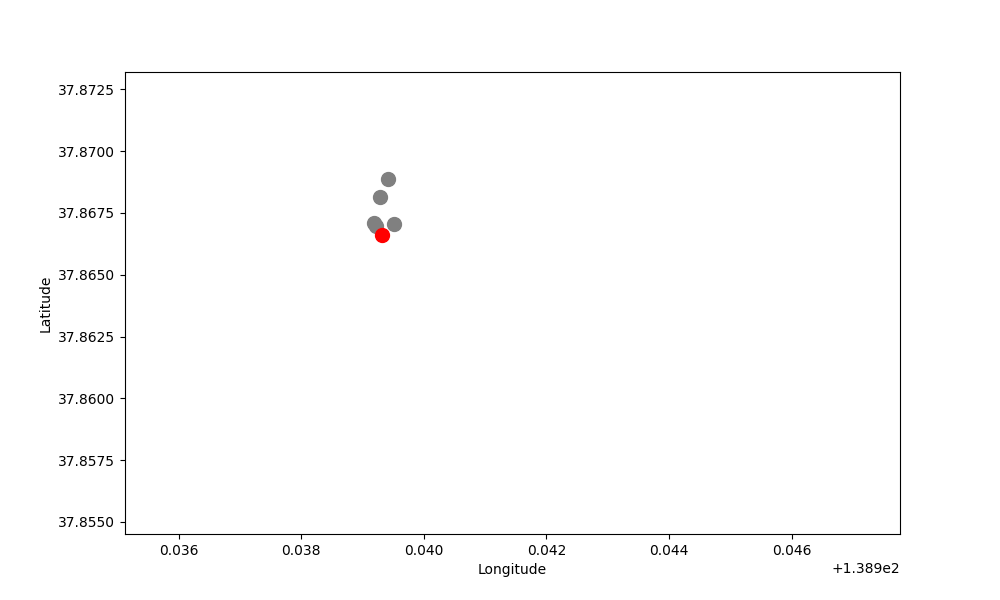

In [3]:

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

%matplotlib widget

def load_gps_data(file_path):
    """JSONファイルからGPSデータを読み込む"""
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError) as e:
                print(f"スキップされた不正なデータ: {entry} | エラー: {e}")
        
        return sorted(processed, key=lambda x: x['time'])
    
    except Exception as e:
        print(f"エラー発生: {str(e)}")
        return []

# ディレクトリ内のJSONファイルをすべて読み込み
data_dir = "C:\\Users\\showe\\Desktop\\experiment\\data\\2025_01_27\\clean\\"
json_files = [f for f in os.listdir(data_dir) if f.endswith(".json")]
all_gps_data = [load_gps_data(os.path.join(data_dir, f)) for f in json_files if load_gps_data(os.path.join(data_dir, f))]

# 各データセットごとに散布図を作成
fig, ax = plt.subplots(figsize=(10, 6))
scatter_list = []
colors = plt.cm.rainbow(np.linspace(0, 1, len(all_gps_data)))

for idx, dataset in enumerate(all_gps_data):
    scatter_list.append(ax.scatter([], [], c=colors[idx], s=100, edgecolors='k', zorder=3))

# 全データで描画範囲を設定
all_lons = [d['lon'] for gps_data in all_gps_data for d in gps_data]
all_lats = [d['lat'] for gps_data in all_gps_data for d in gps_data]
ax.set_xlim(min(all_lons)-0.001, max(all_lons)+0.001)
ax.set_ylim(min(all_lats)-0.001, max(all_lats)+0.001)

# 軸ラベル設定
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

def update(frame):
    artists = []
    for i, gps_data in enumerate(all_gps_data):
        if frame < len(gps_data):
            current = gps_data[frame]
            lon = current['lon']
            lat = current['lat']
            image_length = current['image_length']  # 現在の点のimageLength
            color = 'r' if image_length > 0 else 'gray'  # imageLengthが1以上なら赤、0なら灰色
        
            # 点の位置と色を更新
            scatter_list[i].set_offsets(np.c_[lon, lat])
            scatter_list[i].set_color(color)
            scatter_list[i].set_offsets(np.c_[lon, lat])
        artists.append(scatter_list[i])
    return tuple(artists)

max_frames = max(len(g) for g in all_gps_data)
ani = animation.FuncAnimation(
    fig, update,
    frames=max_frames,
    interval=50,
    blit=False
)

ani.save('anim_multi.mp4', writer="ffmpeg")

In [4]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

def load_gps_data(file_path):
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError):
                pass
        return sorted(processed, key=lambda x: x['time'])
    except:
        return []

data_dir = "C:\\Users\\showe\\Desktop\\experiment\\clean\\2025_01_30"
json_files = glob.glob(os.path.join(data_dir, "*.json"))
all_gps_data = [load_gps_data(f) for f in json_files]
all_gps_data = [d for d in all_gps_data if d]

C:\Users\showe\AppData\Local\Temp\ipykernel_5024\2467559883.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


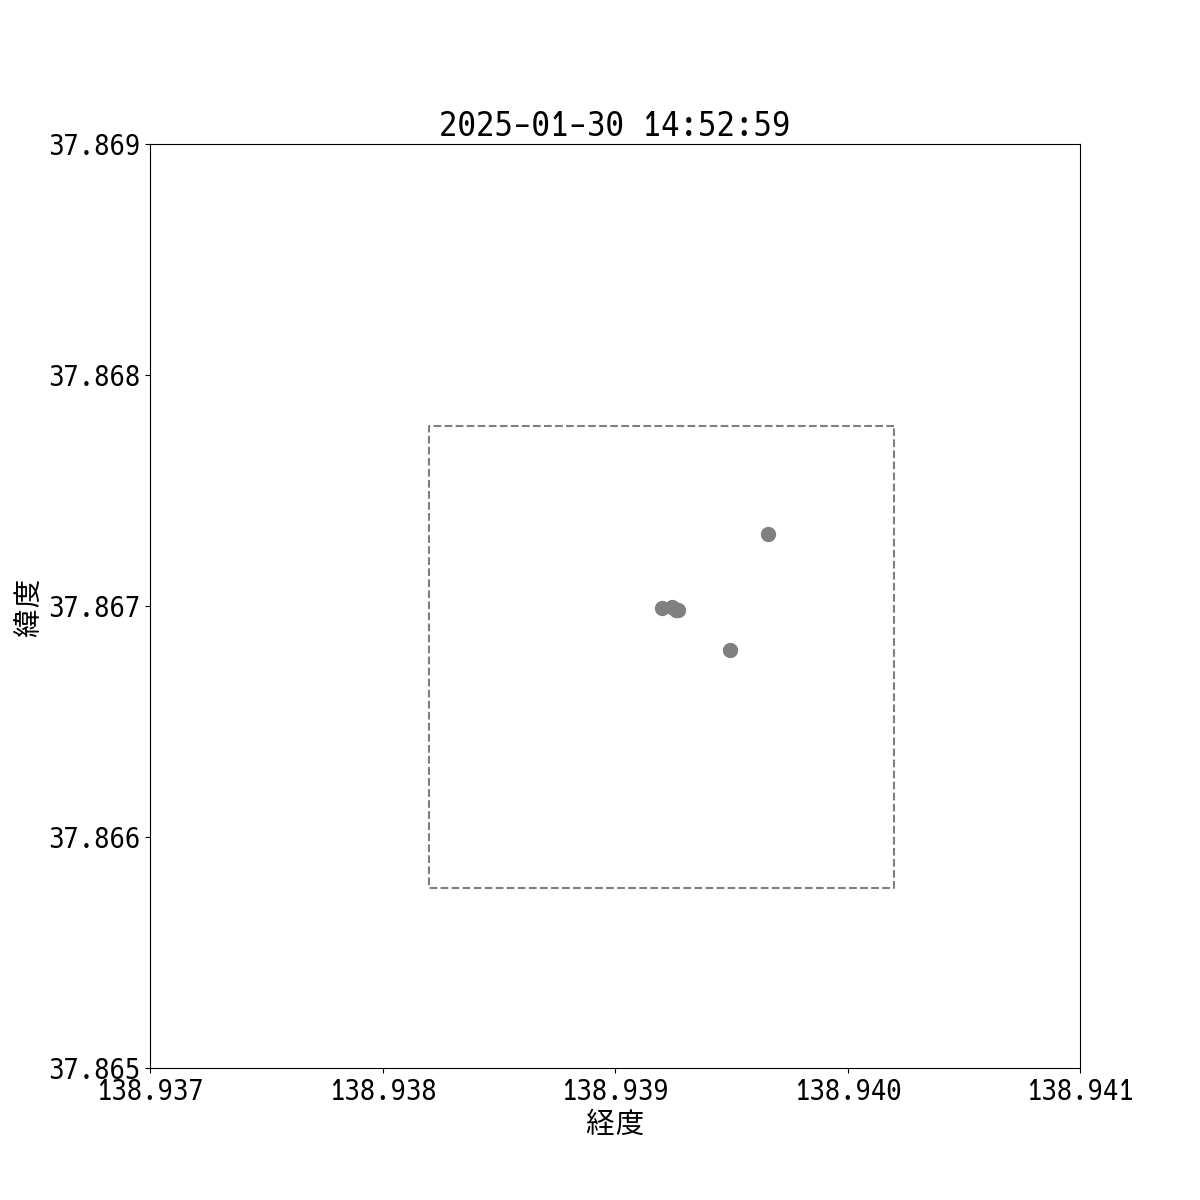

In [27]:
# ...existing code...
import matplotlib.ticker as mticker


if not all_gps_data:
    print("有効なデータがありません")
else:
    # 全データから最小・最大時刻を算出
    min_time = min(min(d['time'] for d in ds) for ds in all_gps_data)
    max_time = max(max(d['time'] for d in ds) for ds in all_gps_data)

    # 10秒刻みのタイムリストを生成
    frame_times = []
    current = min_time
    while current <= max_time:
        frame_times.append(current)
        current += timedelta(seconds=10)

    # グラフ初期化
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.rcParams["font.size"] = 21
    plt.rcParams["font.family"] = "HackGen Console NF"
    scatter_list = []
    colors = plt.cm.rainbow(np.linspace(0, 1, len(all_gps_data)))
    for c in colors:
        scatter_list.append(ax.scatter([], [], c=[c], s=100, edgecolors='k', zorder=3))

    # 描画範囲設定
    all_lons = [d['lon'] for ds in all_gps_data for d in ds]
    all_lats = [d['lat'] for ds in all_gps_data for d in ds]
    #ax.set_xlim(min(all_lons) - 0.001, max(all_lons) + 0.001)
    #ax.set_ylim(min(all_lats) - 0.001, max(all_lats) + 0.001)
    ax.set_xlim(138.939 - 0.002, 138.939 + 0.002)
    ax.set_ylim(37.867 - 0.002, 37.867 + 0.002)
    
    # 軸の設定
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.001))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.001))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
    ax.set_xlabel("経度", fontsize=21)  # x軸のラベルのフォントサイズを変更
    ax.set_ylabel("緯度", fontsize=21)  # y軸のラベルのフォントサイズを変更
    ax.tick_params(axis='both', labelsize=21)

    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

    """
    rectangle_min_lons = 138.939 - 0.01
    rectangle_max_lons = 138.939 + 0.01
    rectangle_min_lats = 37.8668 - 0.01
    rectangle_max_lats = 37.8668 + 0.01

    rectangle_lons = [rectangle_max_lons, rectangle_min_lons, rectangle_min_lons, rectangle_max_lons, rectangle_max_lons]
    rectangle_lats = [rectangle_max_lats, rectangle_max_lats, rectangle_min_lats, rectangle_min_lats, rectangle_max_lats]
    """

    rectangle_lons = [138.9402, 138.9382, 138.9382, 138.9402, 138.9402]
    rectangle_lats = [37.86778, 37.86778, 37.86578, 37.86578, 37.86778]
    ax.plot(rectangle_lons, rectangle_lats, 'k--', alpha=0.5)

    # 指定時刻以下で最も近いポイントを取得する関数
    def get_position_at_time(dataset, t):
        vals = [p for p in dataset if p['time'] <= t]
        if not vals:  # データが無い場合はNone
            return None
        return vals[-1]  # 時間がt以下のうち最後の要素

    def update(frame):
        t = frame_times[frame]
        for i, ds in enumerate(all_gps_data):
            pos = get_position_at_time(ds, t)
            if pos:
                scatter_list[i].set_offsets(np.c_[pos['lon'], pos['lat']])
                color = 'r' if pos['image_length'] > 0 else 'gray'
                scatter_list[i].set_color(color)
        ax.set_title(f"{t.strftime('%Y-%m-%d %H:%M:%S')}")
        return scatter_list

    ani = animation.FuncAnimation(
        fig, update,
        frames=len(frame_times),
        interval=50,
        blit=False
    )
    ani.save('anim_multi_synced2.mp4', writer='ffmpeg')

# ...existing code...

C:\Users\showe\AppData\Local\Temp\ipykernel_17732\3462547583.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


[[{'time': datetime.datetime(2025, 1, 30, 11, 46, 37, 372000), 'lat': 37.8669879, 'lon': 138.9392585, 'image_length': 0}, {'time': datetime.datetime(2025, 1, 30, 11, 46, 41, 214000), 'lat': 37.8669879, 'lon': 138.9392585, 'image_length': 0}, {'time': datetime.datetime(2025, 1, 30, 11, 46, 47, 14000), 'lat': 37.8669775, 'lon': 138.9392728, 'image_length': 0}, {'time': datetime.datetime(2025, 1, 30, 11, 46, 51, 277000), 'lat': 37.8669872, 'lon': 138.9392531, 'image_length': 0}, {'time': datetime.datetime(2025, 1, 30, 11, 46, 57, 20000), 'lat': 37.8669805, 'lon': 138.9392701, 'image_length': 0}, {'time': datetime.datetime(2025, 1, 30, 11, 47, 1, 311000), 'lat': 37.866987, 'lon': 138.9392505, 'image_length': 1}, {'time': datetime.datetime(2025, 1, 30, 11, 47, 5, 662000), 'lat': 37.8669751, 'lon': 138.9393572, 'image_length': 1}, {'time': datetime.datetime(2025, 1, 30, 11, 47, 8, 664000), 'lat': 37.8669817, 'lon': 138.9393597, 'image_length': 1}, {'time': datetime.datetime(2025, 1, 30, 11, 

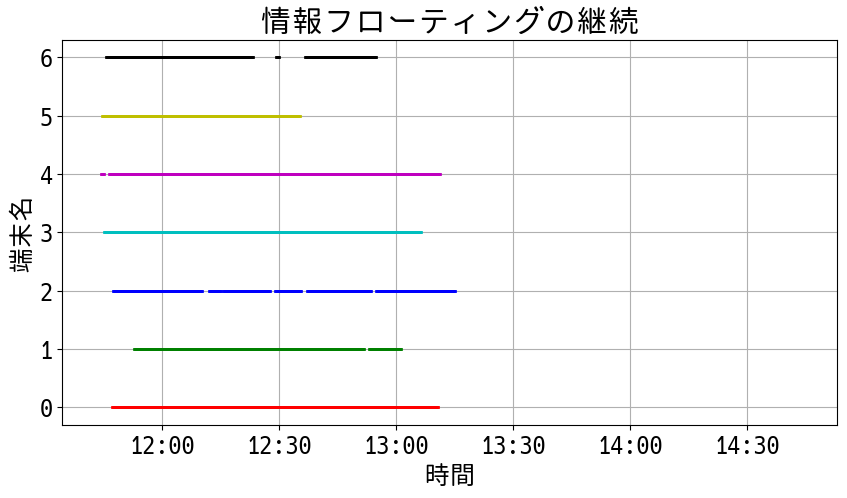

In [9]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def load_gps_data(file_path):
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError):
                pass
        return sorted(processed, key=lambda x: x['time'])
    except:
        return []

data_dir = "C:\\Users\\showe\\Desktop\\experiment\\clean\\2025_01_30"
json_files = glob.glob(os.path.join(data_dir, "*.json"))
all_gps_data = [load_gps_data(f) for f in json_files]
print(all_gps_data)

# 全データから最小・最大時刻を算出
min_time = min(min(d['time'] for d in ds) for ds in all_gps_data)
max_time = max(max(d['time'] for d in ds) for ds in all_gps_data)

# 10秒刻みのタイムリストを生成
frame_times = []
current = min_time
while current <= max_time:
    frame_times.append(current)
    current += timedelta(seconds=10)

def get_imageLength_at_time(dataset, t):
    vals = [p for p in dataset if p['time'] <= t]
    if not vals:  # データが無い場合はNone
        return None
    return vals[-1]  # 時間がt以下のうち最後の要素

plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "HackGen Console NF"
plt.figure(figsize=(10, 5))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']

for idx, data in enumerate(all_gps_data):

    results = []

    for time in frame_times:
        pos = get_imageLength_at_time(data, time)
        length = pos['image_length'] if pos else 0
        results.append((time, length))

    for i in range(len(results) - 1):
        if i == 0:
            continue
        if results[i][1] * results[i - 1][1] > 0:
            plt.plot([results[i][0], results[i-1][0]], [idx, idx], color=colors[idx], linewidth=2)

plt.xlabel('時間')
plt.ylabel('端末名')
plt.title('情報フローティングの継続')
plt.grid(True)

plt.xlim(min_time, max_time + timedelta(seconds=10)) 

# 時間のみを表示するフォーマットに設定
time_fmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(time_fmt)
plt.show()

